In [ ]:
import pandas as pd
cc=pd.read_csv("transactions.csv")
cc

,Transaction ID,Timestamp,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status
0,4d3db980-46cd-4158-a812-dcb77055d0d2,22-06-2024 04:06,Tiya Mall,4161803452@okaxis,Mohanlal Golla,7776849307@okybl,3907.34,FAILED
1,099ee548-2fc1-4811-bf92-559c467ca792,19-06-2024 06:04,Mohanlal Bakshi,8908837379@okaxis,Mehul Sankaran,7683454560@okaxis,8404.55,SUCCESS
2,d4c05732-6b1b-4bab-90b9-efe09d252b99,04-06-2024 04:56,Kismat Bora,4633654150@okybl,Diya Goel,2598130823@okicici,941.88,SUCCESS
3,e8df92ee-8b04-4133-af5a-5f412180c8ab,09-06-2024 09:56,Ayesha Korpal,7018842771@okhdfcbank,Rhea Kothari,2246623650@okaxis,8926.00,SUCCESS
4,e7d675d3-04f1-419c-a841-7a04662560b7,25-06-2024 08:38,Jivin Batta,1977143985@okybl,Baiju Issac,5245672729@okybl,2800.55,SUCCESS
...,...,...,...,...,...,...,...,...
114,26802397-e0ce-4c56-89cf-004e5d50785a,27-06-2024 09:59,Raunak Buch,8857101383@okhdfcbank,Azad Doctor,1942611767@okybl,3454.06,SUCCESS
115,8fb30c44-8411-4ada-a7e0-0c45c71eced0,28-06-2024 07:58,Vaibhav Choudhary,0495028936@okybl,Mamooty Chand,7492419654@okicici,8429.67,FAILED
116,4099b9a7-f934-4911-92bd-bcb6811794dc,04-06-2024 12:12,Tanya Soman,4574184542@okaxis,Amira Gopal,2288324828@okaxis,2131.08,SUCCESS
117,79770bd3-0359-4311-9079-a80cd4dde353,12-06-2024 07:52,Anvi Raman,6563486398@okaxis,Divit Shukla,7136498363@okybl,4629.99,SUCCESS


In [ ]:
cc.isna().sum()

Transaction ID     0
Timestamp          0
Sender Name        0
Sender UPI ID      0
Receiver Name      0
Receiver UPI ID    0
Amount (INR)       0
Status             0
dtype: int64

In [ ]:
cc.shape

(119, 8)

In [ ]:

import matplotlib
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show(close=None, block=None)>

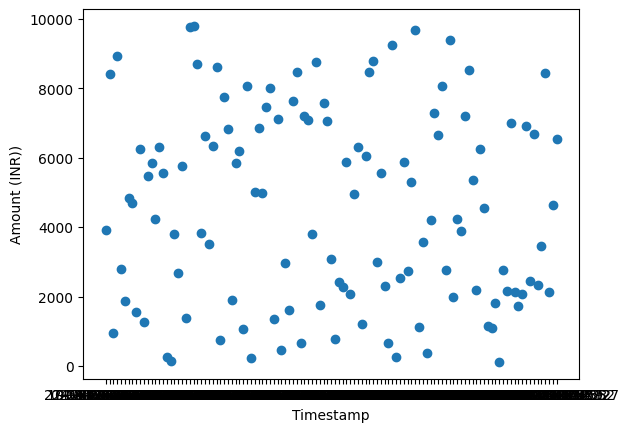

In [ ]:
x=cc["Timestamp"]
y=cc["Amount (INR)"]
plt.plot(x,y,"o")
plt.xlabel("Timestamp")
plt.ylabel("Amount (INR))")
plt.show

In [ ]:
from scipy.stats import linregress
import pandas as pd

cc['Timestamp'] = pd.to_datetime(cc['Timestamp']).astype(int) / 10**9

cc['Amount (INR)'] = pd.to_numeric(cc['Amount (INR)'], errors='coerce')

res = linregress(cc["Timestamp"], cc["Amount (INR)"])
print(res)

LinregressResult(slope=-386390.56133236183, intercept=668685.0696603614, rvalue=-0.0993391290911092, pvalue=0.2824262813145922, stderr=357815.97053332673, intercept_stderr=615023.6924777455)


In [ ]:
from scipy.stats import linregress
import pandas as pd

intercept = res.intercept

def predict_amount(timestamp):
    return slope * timestamp + intercept

new_timestamp = 1678886400
predicted_amount = predict_amount(new_timestamp)

print(f"Predicted Amount (INR) for timestamp {new_timestamp}: {predicted_amount}")

Predicted Amount (INR) for timestamp 1678886400: -648705857840583.0


In [ ]:
correlation = cc['Timestamp'].corr(cc['Amount (INR)'])
print(correlation)

-0.09933912909110919


In [ ]:
cc_sorted['Initial'] = cc_sorted['Sender Name'].str[0]

grouped_senders = cc_sorted.groupby('Initial')

for initial, group in grouped_senders:
    print(f"Senders starting with '{initial}':")
    print(group['Sender Name'].tolist())
    print()

Senders starting with 'A':
['Aaina Andra', 'Aarna Kulkarni', 'Alia Tella', 'Amani Ratta', 'Anahita Korpal', 'Anika Deep', 'Anika Keer', 'Aniruddh Bal', 'Anvi Dalal', 'Anvi Raman', 'Anya Bhatnagar', 'Aradhya Sachdev', 'Ayesha Korpal']

Senders starting with 'B':
['Baiju Koshy', 'Biju Bhatt']

Senders starting with 'C':
['Chirag Khare']

Senders starting with 'D':
['Dhanush Goda', 'Dhanush Madan', 'Dishani Walia', 'Divit Walia', 'Divyansh Borah', 'Divyansh Salvi', 'Diya Halder']

Senders starting with 'E':
['Ehsaan Mammen', 'Emir Choudhry', 'Emir Setty', 'Eshani Bail', 'Eshani Ram']

Senders starting with 'F':
['Farhan Mani', 'Fateh Baria', 'Fateh Chaudhary', 'Fateh Saha']

Senders starting with 'H':
['Heer Konda']

Senders starting with 'I':
['Inaaya  Varty', 'Indrans Dyal', 'Ira Chand', 'Ira Walia', 'Ishita Trivedi', 'Ivana Tak']

Senders starting with 'J':
['Jayan Sahota', 'Jivika Som', 'Jivin Batta', 'Jiya Doctor']

Senders starting with 'K':
['Kabir Mander', 'Kaira Tak', 'Kashvi Sha